In [8]:
%matplotlib notebook 
import math
import triangle
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## 3D plotting 
slide 2

The function $f(x,y)$

In [3]:
@np.vectorize  # makes numpy easier
def f(x,y):
    return x*y*np.exp(-x)

The domain $D$

In [53]:
X=np.linspace(0, 5,101,endpoint=True)
Y=np.linspace(0,10,101,endpoint=True)

In [54]:
Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)

Plot it

<IPython.core.display.Javascript object>


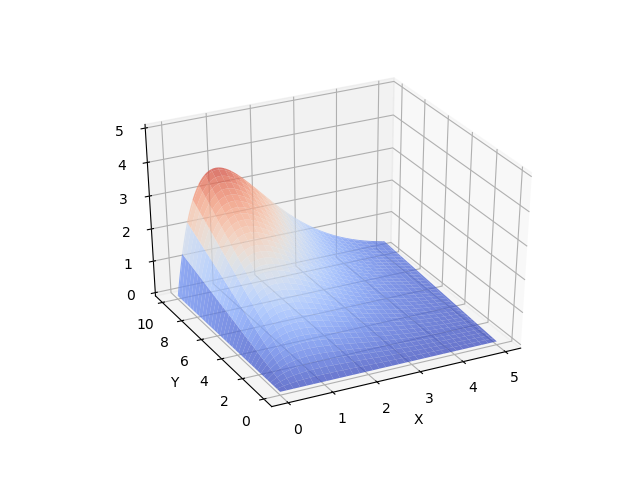

In [55]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(0,5)
ax.plot_surface( Xs,Ys,Zs,alpha=0.75,cmap=cm.coolwarm,vmin=0,vmax=4)

## Add contours

<IPython.core.display.Javascript object>


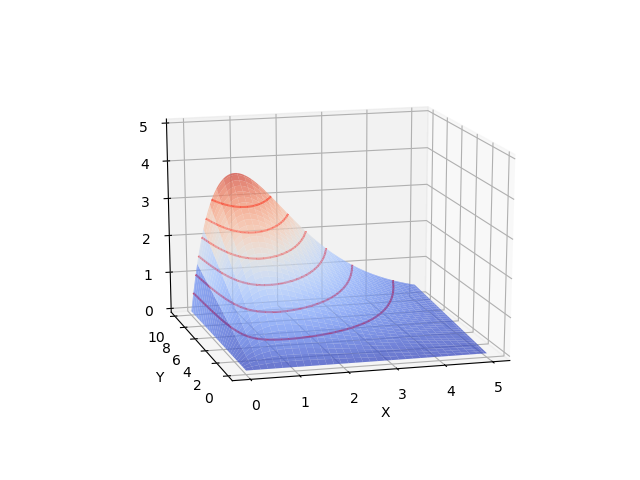

In [56]:
levels=np.arange(0.5,3.5,0.5)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(0,5)
ax.plot_surface( Xs,Ys,Zs,alpha=0.75,cmap=cm.coolwarm,vmin=0,vmax=4)
cont = ax.contour3D(Xs, Ys, Zs, levels, zorder=1,alpha=1,colors='Red',vmin=0,vmax=4)

# Plot on a domain

In [278]:
@np.vectorize
def f(x,y):
    return np.sqrt(max(4.-x**2-y**2,0))

In [279]:
X=np.linspace(-3,3,51)
Y=np.linspace(-3,3,51)
Xs,Ys = np.meshgrid(X,Y)
Zs = f(Xs,Ys)

<IPython.core.display.Javascript object>


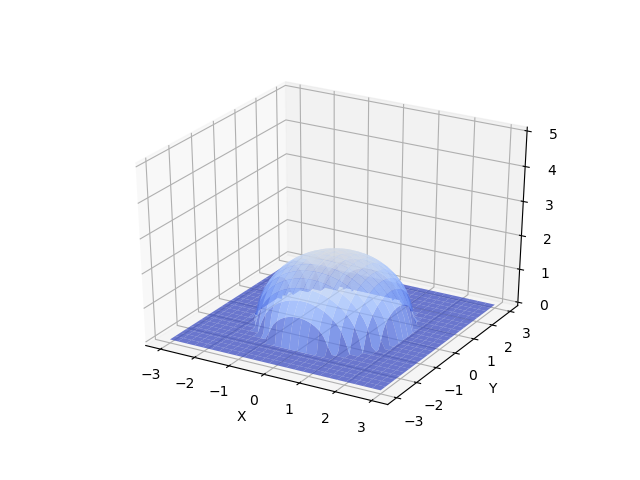

In [280]:

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(0,5)
ax.plot_surface( Xs,Ys,Zs,alpha=0.75,cmap=cm.coolwarm,vmin=0,vmax=4)

In [281]:
def create_mesh( pathXY, minArea=0.05 ):
    N=len(pathXY)
    i=np.arange(N)
    segs=np.stack([i, i + 1], axis=1) % N
    tri=triangle.triangulate({'vertices':pathXY,'segments':segs},'qpa{}'.format(minArea))
    return tri

In [303]:
t = np.linspace(0,2*np.pi,63)
path = np.stack((2*np.sin(t),2*np.cos(t)),axis=1)

<IPython.core.display.Javascript object>


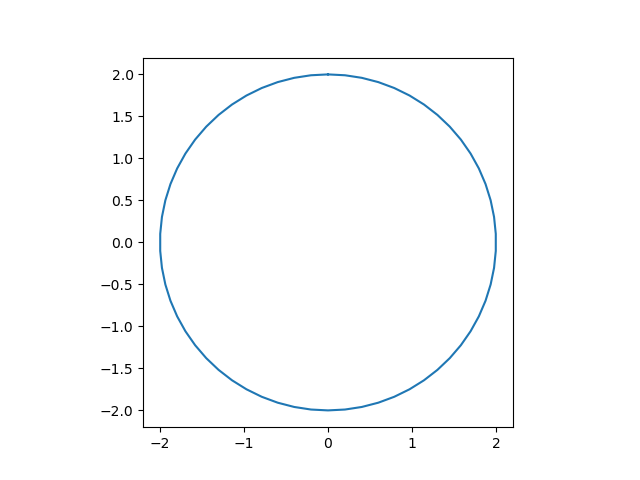

In [304]:
fig,ax = plt.subplots(1,1)
ax.plot(path[:,0],path[:,1])
ax.set_aspect('equal')

In [305]:
tri=create_mesh(path,minArea=0.05)

<IPython.core.display.Javascript object>


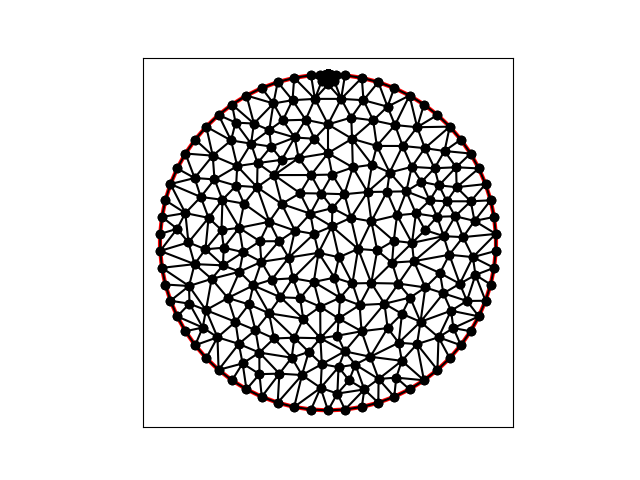

In [306]:
fig,ax = plt.subplots(1,1)
triangle.plot(ax,**tri)

<IPython.core.display.Javascript object>


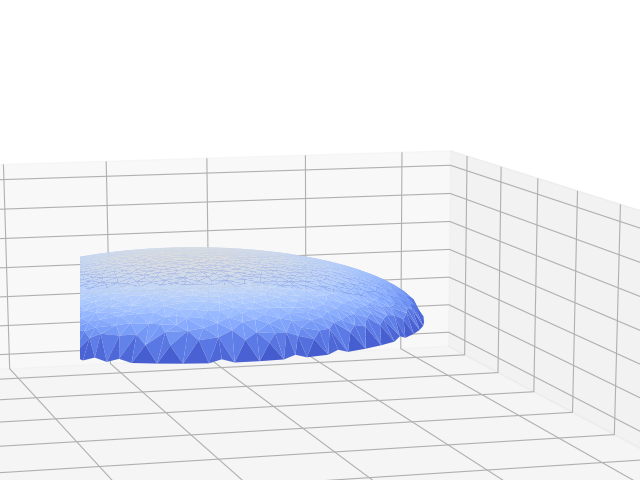

In [307]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

tri = create_mesh(path,minArea=0.01)
XY,triangles=tri['vertices'],tri['triangles']
Z=f(XY[:,0],XY[:,1])
ax.plot_trisurf(XY[:,0],XY[:,1],Z,triangles=triangles,**color_dict)

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1,1,1.4,1]))

# Slicing
slide 6

In [309]:
@np.vectorize
def f(x,y):
    return x**2+y**2

The domain $D$

In [310]:
X=np.linspace(-2,2,101,endpoint=True)
Y=np.linspace(-2,2,101,endpoint=True)

In [311]:
Xs,Ys = np.meshgrid(X,Y)
Zs = f(Xs,Ys)

<IPython.core.display.Javascript object>


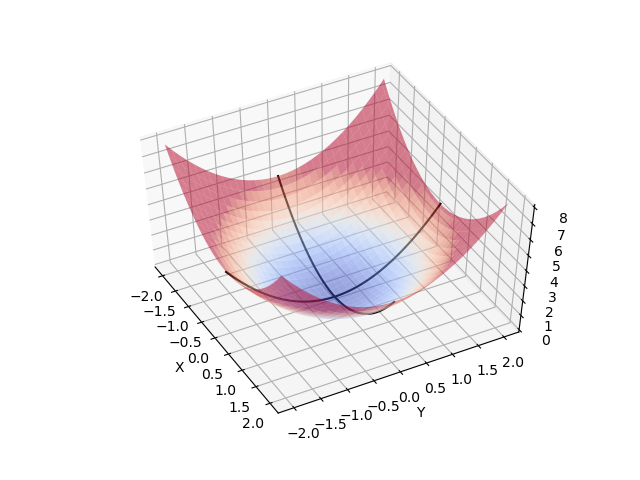

In [328]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot_surface( Xs,Ys,Zs,alpha=0.5,**color_dict)

k=0
ax.plot( X,k*np.ones_like(X), f(X,k),color='Black')

ax.plot( k*np.ones_like(Y),Y, f(k,Y),color='Black')


In [329]:
X=np.linspace(0,2,101,endpoint=True)
Y=np.linspace(0,2,101,endpoint=True)

In [330]:
Xs,Ys = np.meshgrid(X,Y)
Zs = f(Xs,Ys)

<IPython.core.display.Javascript object>


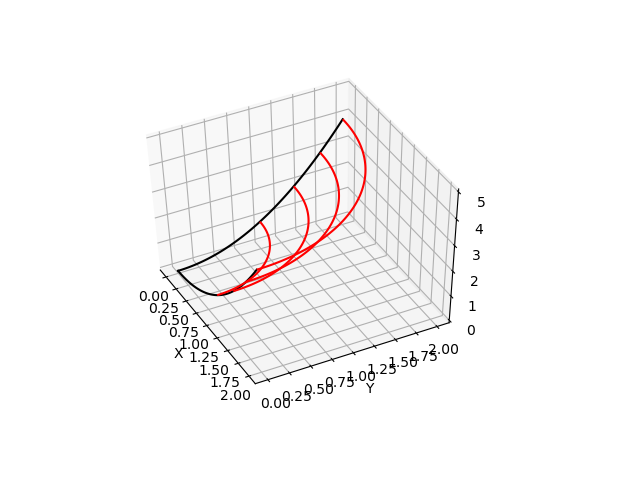

In [337]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.plot_surface( Xs,Ys,Zs,alpha=0.5,**color_dict)

k=0
ax.plot( X,k*np.ones_like(X), f(X,k),color='Black')

ax.plot( k*np.ones_like(Y),Y, f(k,Y),color='Black')
ax.set_zlim(0,5)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.8,0.8,1,1]))

cont = ax.contour3D(Xs, Ys, Zs, [1,2,3,4], zorder=1,alpha=1,colors='Red',vmin=0,vmax=4)

# Contours 
slide 5

In [338]:
@np.vectorize  # makes numpy easier
def f(x,y):
    return x*y*np.exp(-x)

The domain $D$

In [339]:
X=np.linspace(0, 5,101,endpoint=True)
Y=np.linspace(0,10,101,endpoint=True)

In [340]:
Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)

<IPython.core.display.Javascript object>


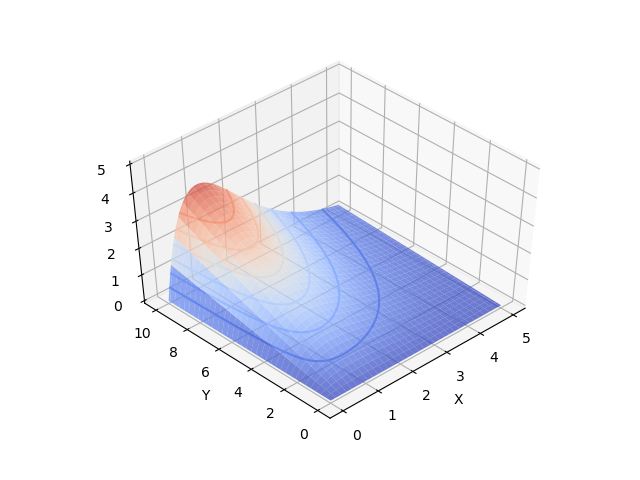

In [341]:
color_dict=dict(cmap=cm.coolwarm,vmin=0,vmax=4)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(0,5)
ax.plot_surface( Xs,Ys,Zs,alpha=0.75,**color_dict)
cont = ax.contour3D(Xs, Ys, Zs, levels, **color_dict)

<IPython.core.display.Javascript object>


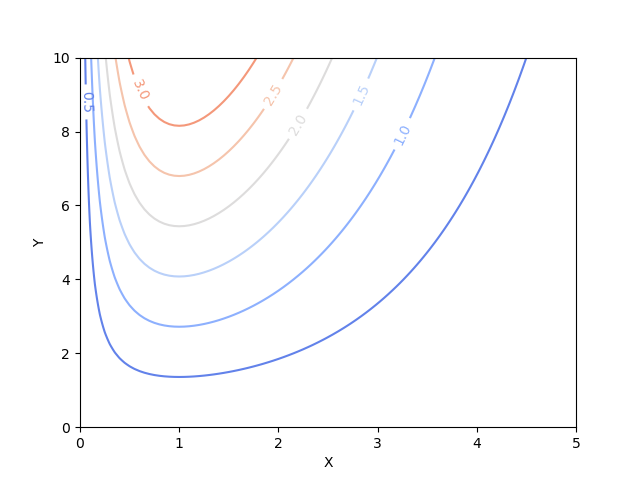

Text(0, 0.5, 'Y')

In [342]:
fig,ax = plt.subplots(1,1)
CS=plt.contour(Xs,Ys,Zs,levels=levels,**color_dict)
ax.clabel(CS, CS.levels,fmt="%.1f")
ax.set_xlabel('X')
ax.set_ylabel('Y')


# 3D plot in sympy

In [136]:
from sympy import Symbol, sqrt
from sympy.plotting import plot3d

<IPython.core.display.Javascript object>


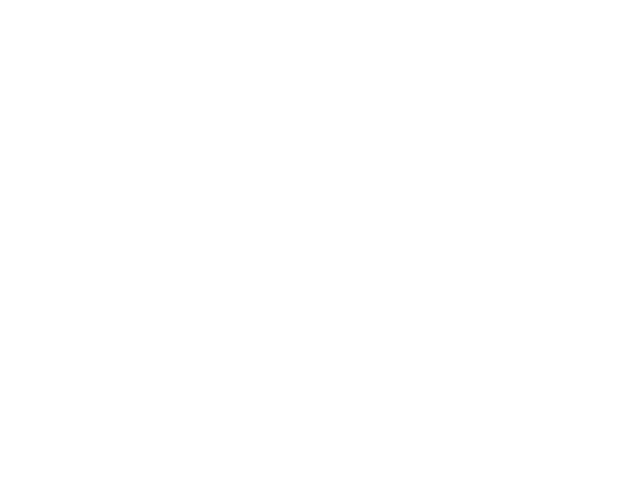

In [247]:
x = Symbol('x',real=True)
y = Symbol('y',real=True)
p=plot3d(sqrt(4-x**2-y**2),(x,-3,3),(y,-3,3),zlim=[0,2],**color_dict)
fig, [ax] = p._backend.fig, p._backend.ax  # get matplotib's figure and axes


ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1,1,1.41,1]))

fig.canvas.draw()